## 13th Feb 2024

In [2]:
import pandas as pd

In [3]:
#In google colab, we can't get the datasets using the location from system as it gives error. So that why we use drive here to get the dataset.
# once we mount the drive and give permission our drive gets connected to colab.then we can see the files from our drive and select the neccessary file. I need rawdata.xlsx file here.
# in jupyter its we can get the location from system to import the datasets.


#emp = pd.read_excel('/content/drive/MyDrive/Rawdata.xlsx')     #for google colab

emp = pd.read_excel(r'E:\Data Science\2. FEB\12th - Eda practicle\EDA- Practicle\Rawdata.xlsx')

emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


the main difference between google colab and jupyter notebook is that when the data set gets imported it shows few options such as Interactive Table,Suggest charts,generate codes using dataframes and many more features.

But in jupyter we have to write the code for that too means for plotting graphs. we won't have such suugestive tools here. And in google colab one new feature got added which is "Colab AI".

In [3]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [4]:
# we can see that in all the columns we have special characters also some missing values.
# so our fisrt step is to clean the data

emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [5]:
# to get better understanding of how many miising values are there in each column we use .isnull().sum.
# this the count of all the missing values in each column.

emp.isnull().sum()

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

So we have 2 null values from Age and Location and columns and 1 missing value from EXp column.

# Data Cleaning:---

In [6]:
## as we can see that Name column doesn't have any missing values but it has some special characters mixed.
# so our first step is to remove all the missing characters.

emp['Name']

0      Mike
1    Teddy^
2     Uma#r
3      Jane
4    Uttam*
5       Kim
Name: Name, dtype: object

# replace():--

.str.replace(r'\W', ''): This uses the replace() function with a regular expression pattern \W, which matches any non-alphanumeric character (i.e., anything that is not a letter, digit, or underscore). It replaces all matches with an empty string, effectively removing them.

In [7]:
emp['Name'] = emp['Name'].str.replace(r'\W', '')

# for categorical data we use replace to remove all the unwanted data other than the alphabets.
# r\W is used to replace all the non- alphabetic data with ' ' and gives the output.

#emp['Name'] = emp['Name'].str.replace(r'\W', '', regex=True)

# emp['Name'] = emp['Name'].str.replace(r'\W', '') this doesn't work without regex=True.
#so inorder to remove non-alphabetical words from Name col use regex. But, in google colab regex=True not needed.

In [8]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy,Testing,45' yr,Bangalore,10%%000,<3
2,Umar,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [8]:
emp['Domain'] = emp['Domain'].str.replace(r'\W', '')

In [10]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34 years,Mumbai,5^00#0,2+
1,Teddy,Testing,45' yr,Bangalore,10%%000,<3
2,Umar,Dataanalyst,NaN,NaN,1$5%000,4> yrs
3,Jane,Analytics,NaN,Hyderbad,2000^0,NaN
4,Uttam,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [11]:
# for numerical data we use .extract() function to extract all the digits and removes all the other special characters or letter from it.


emp['Age'] = emp['Age'].str.extract('(\d+)')

In [12]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5^00#0,2+
1,Teddy,Testing,45,Bangalore,10%%000,<3
2,Umar,Dataanalyst,NaN,NaN,1$5%000,4> yrs
3,Jane,Analytics,NaN,Hyderbad,2000^0,NaN
4,Uttam,Statistics,67,NaN,30000-,5+ year
5,Kim,NLP,55,Delhi,6000^$0,10+


In [13]:
emp['Salary'] = emp['Salary'].str.replace(r'\W', '')
# for salary we used replace because there is no string mixed in it. If numerical data is misxed with the strings them we use extract.

emp['Exp'] = emp['Exp'].str.extract('(\d+)')

<ipython-input-13-815cbaba6937>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  emp['Salary'] = emp['Salary'].str.replace(r'\W', '')


In [14]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


# Applying EDA Techniques
here we also have missing values so before building models we need to fill the missing values.

so for that we need to also combine with numpy package.

# fillna():------
so using .fillna() we are filling the mean values in the missing value fields. where fillna is npthing but fill null values.

In [15]:
clean_data = emp.copy()

In [16]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [ ]:
# APPLYING EDA TECHNIQUES.

#here we also have missing values so before building models we need to fill the missing values.
# so for that we need to also combine with numpy package.

In [17]:
clean_data.isnull().sum()

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

In [18]:
import numpy as np

In [19]:
# so using .fillna() we are filling the mean values in the missing value fields.
# where fillna is npthing but fill null values.

clean_data['Age'] = clean_data['Age'].fillna(np.mean(pd.to_numeric(clean_data['Age'])))

In [20]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,NaN,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [21]:
clean_data['Exp'] = clean_data['Exp'].fillna(np.mean(pd.to_numeric(clean_data['Exp'])))

In [22]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,NaN,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


# mode()[0]
is nothing but, selecting the first mode if there are multiple modes. at the end [0] is mandatory because ot is the value of the mode. the first index.

- as we have different locations here and dont understand whether which value to be filled then by default we can give the first mode value.

In [23]:


clean_data['Location'] = clean_data['Location'].fillna(clean_data['Location'].mode()[0])

In [24]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,Bangalore,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [25]:
clean_data.isnull().sum()       # now we don't have any null values. Its clean now.

Name        0
Domain      0
Age         0
Location    0
Salary      0
Exp         0
dtype: int64

In [27]:
# emp data set is the previos one where we haven't filled the missing values. lets check it once.

emp.isnull().sum()
                           # we have nulls in emp.but in clean data above we have filled them.

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

# astype():-----
lets change the object data type to int or float or category.

this .astype() function is used to change one data type to another datatype..

Like by default here we have all the datatypes as objects. Now here we change them to int and categorical dtypes

In [28]:
clean_data['Age'] = clean_data['Age'].astype('int')
clean_data['Salary'] = clean_data['Salary'].astype('int')
clean_data['Exp'] = clean_data['Exp'].astype('int')
clean_data['Name'] = clean_data['Name'].astype('category')
clean_data['Domain'] = clean_data['Domain'].astype('category')
clean_data['Location'] = clean_data['Location'].astype('category')



In [29]:
clean_data.info()       # now lets check

# we can see that they have changed from object to int and category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      int64   
 3   Location  6 non-null      category
 4   Salary    6 non-null      int64   
 5   Exp       6 non-null      int64   
dtypes: category(3), int64(3)
memory usage: 934.0 bytes


In [30]:
clean_data.describe()          # by default it gives the statustical data of numerical data

,Age,Salary,Exp
count,6.000000,6.000000,6.000000
mean,50.166667,23333.333333,4.666667
std,10.907184,19916.492328,2.804758
min,34.000000,5000.000000,2.000000
25%,46.250000,11250.000000,3.250000
50%,50.000000,17500.000000,4.000000
75%,53.750000,27500.000000,4.750000
max,67.000000,60000.000000,10.000000


# convert the objects to system

we use a code:   dataset.to_csv(‘ write the name of the file.csv’)

In [31]:
clean_data.to_csv('clean_data.csv')

In [32]:
import os
os.getcwd()

'/content'

# MATPLOTLIB AND SEABORN VISUALIZATIONS

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
clean_data['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: int64

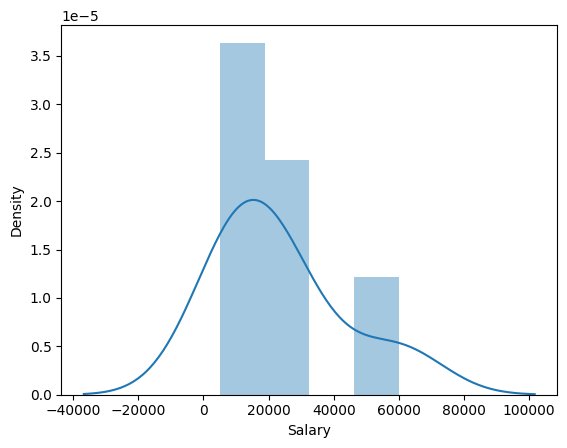

In [37]:
vis1 = sns.distplot(clean_data['Salary'])    #UNIVARIATE ANALYSIS

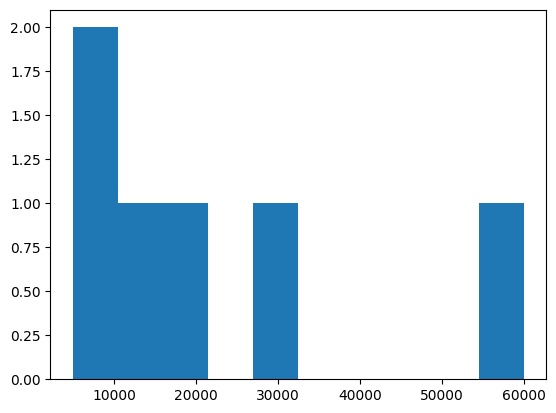

In [38]:
vis2 = plt.hist(clean_data['Salary'])       #UNIVARIATE ANALYSIS

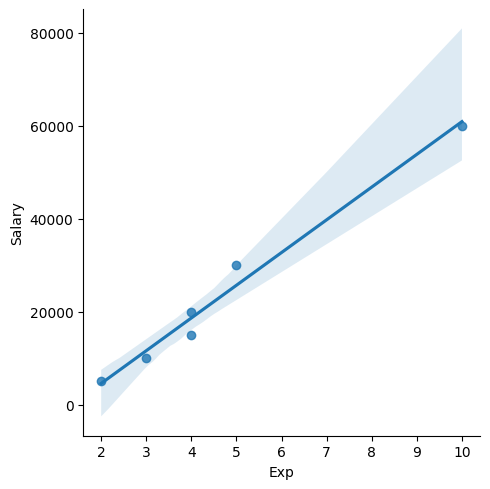

In [40]:
vis3 = sns.lmplot(data = clean_data, x= 'Exp', y='Salary') #BIVARIATE ANALYSIS

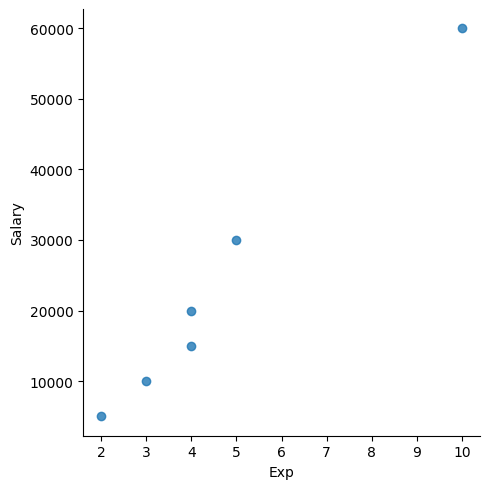

In [41]:
# IF You don't want that near line we can remove that using fit_reg = False.

vis4 = sns.lmplot(data = clean_data, x= 'Exp', y='Salary', fit_reg = False)

In [ ]:
# for finding the outlier it is much easy to understand now. And also It looks like Strong Positive Corelation where its range is 0 to 1.

In [42]:
# FINDING DEPENDENT VARIABLE IS VERY IMPORTANT.(VARIABLE IDENTIFICATION)

#So here, Salary is the dependent variable and else are independent variable.
# since salary depends on Exp, domain etc.


In [43]:
clean_data.columns

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [45]:
X_iv = clean_data[['Name', 'Domain', 'Age', 'Location','Exp']]

In [46]:
X_iv          # x independent variable

,Name,Domain,Age,Location,Exp
0,Mike,Datascience,34,Mumbai,2
1,Teddy,Testing,45,Bangalore,3
2,Umar,Dataanalyst,50,Bangalore,4
3,Jane,Analytics,50,Hyderbad,4
4,Uttam,Statistics,67,Bangalore,5
5,Kim,NLP,55,Delhi,10


In [47]:
Y_dv = clean_data['Salary']

In [48]:
Y_dv            # y dependent variable

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: int64

# IMPUTATION

there are 2 techniques:  

1. One hot encoder or dummy variables

2. Label encoder

.get_dummies() :--- In Pandas, the get_dummies() function is used to convert categorical variables into dummy/indicator variables. These dummy variables are binary (0 or 1) representations of the categories in the original categorical variable.

In [50]:
imputation = pd.get_dummies(clean_data)

In [51]:
imputation

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,45,10000,3,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,50,15000,4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,50,20000,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,67,30000,5,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
5,55,60000,10,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [54]:
# now lets check the length

len(imputation.columns)   # no.of cols

19

In [56]:
len(imputation)       #no.of rows

6

#### Git operations:-

In [2]:
print('git operations')

git operations


In [3]:
print("hi")

hi
